### **Contour Extraction Algorithm From Binary Map**
This code implements contour extraction algorithm from 2D binary map.

Following script is a usage example of this code.

In [9]:
# Include modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

from contour import getContour

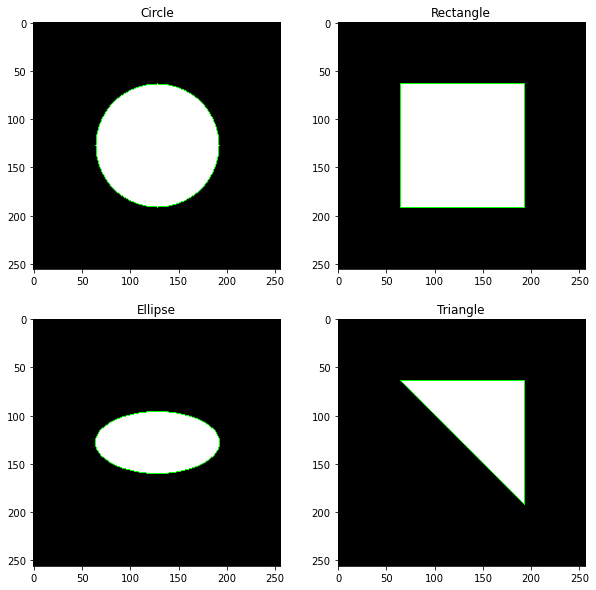

In [25]:
# Make sample images
imsample_circ = np.zeros((256, 256), dtype=np.uint8)    # circle
imsample_rect = np.zeros((256, 256), dtype=np.uint8)    # rectangular
imsample_elli = np.zeros((256, 256), dtype=np.uint8)    # ellipse
imsample_tri = np.zeros((256, 256), dtype=np.uint8)    # triangle

cv2.circle(imsample_circ, 
           center=(128, 128), 
           radius=64, 
           color=255, 
           thickness=-1)
cv2.rectangle(imsample_rect, 
              pt1=(64, 64), 
              pt2=(192, 192), 
              color=255, 
              thickness=-1)
cv2.ellipse(imsample_elli, 
            center=(128, 128), 
            axes=(64, 32), 
            angle=0, 
            startAngle=0, 
            endAngle=360, 
            color=255, 
            thickness=-1)
cv2.fillConvexPoly(imsample_tri, 
                   points=np.array([(64, 64), (192, 64), (192, 192)]), 
                   color=255)

# Stack samples
imsamples = np.stack([imsample_circ,
                      imsample_rect,
                      imsample_elli,
                      imsample_tri], axis=0)

# Find contours
contours = [getContour(imsample) for imsample in imsamples]

# Draw result
def drawContour(imsamples, contours):
    # Define plot components
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    # Combine image and contour
    bgr = np.zeros((4, 256, 256, 3), dtype=np.uint8)
    for index in range(4):
        bgr[index] = imsamples[index, ..., np.newaxis]
        for i, j in contours[index]:
            bgr[index, i, j] = (0, 255, 0)
    
    # Plot images
    axes[0, 0].imshow(bgr[0]); axes[0, 0].set_title("Circle")
    axes[0, 1].imshow(bgr[1]); axes[0, 1].set_title("Rectangle")
    axes[1, 0].imshow(bgr[2]); axes[1, 0].set_title("Ellipse")
    axes[1, 1].imshow(bgr[3]); axes[1, 1].set_title("Triangle")
    
drawContour(imsamples, contours)